<a href="https://colab.research.google.com/github/sanjaykhadanga/Capstone-Project---Two/blob/main/Bike_Sharing_Demand_Prediction(sanjay)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Loading Dataset and Importing Modules**

In [1]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')



#Mount the drive nad import the datset

In [2]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive
bike_df=pd.read_csv('/content/drive/MyDrive/bike sharing demand prediction/SeoulBikeData.csv',encoding ='latin')

# **Understand More About The Data**

In [4]:
# Viewing the data of top 5 rows to take a glimps of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# View the data of bottom 5 rows to take a glimps of the data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#Getting the shape of dataset with rows and columns
print(bike_df.shape)

(8760, 14)


In [7]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [10]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


* ***This Dataset contains 8760 lines and 14 columns.*** 
***In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.*** 

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






# **Preprocessing the dataset**

In [11]:
#check for count of missing values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

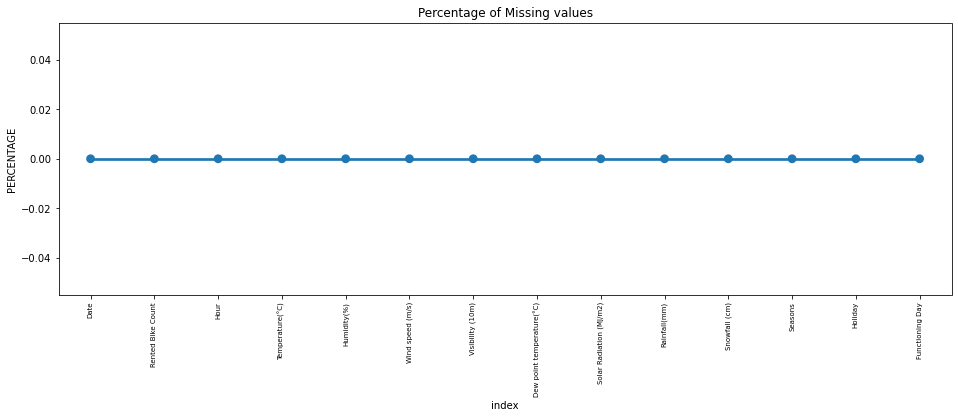

In [12]:
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [13]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***Some of  the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it don't affect our end results.***

In [14]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***





In [15]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [16]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [17]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [18]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [19]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [20]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

* ***As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

In [21]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [22]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [23]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# **Exploratory Data Analysis Of The Data Set**

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type***

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

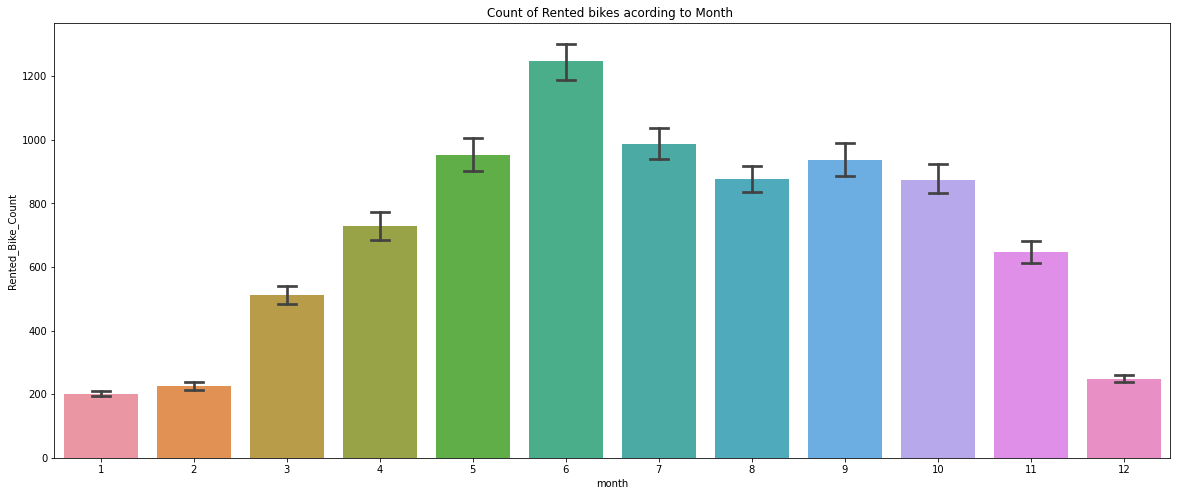

In [24]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

* ***From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.***

[Text(0.5, 1.0, 'Count of Rented bikes acording to Day ')]

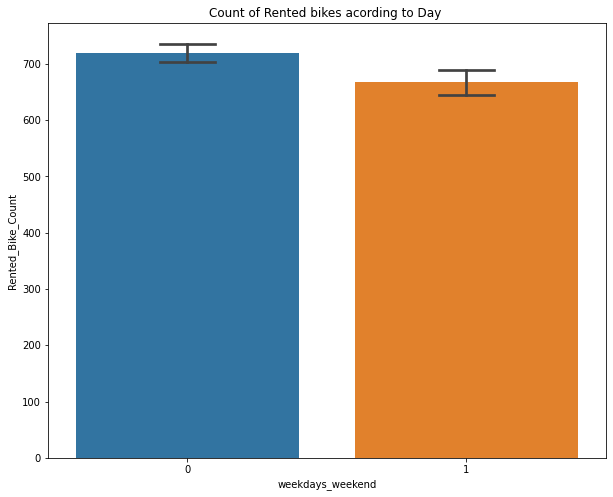

In [25]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

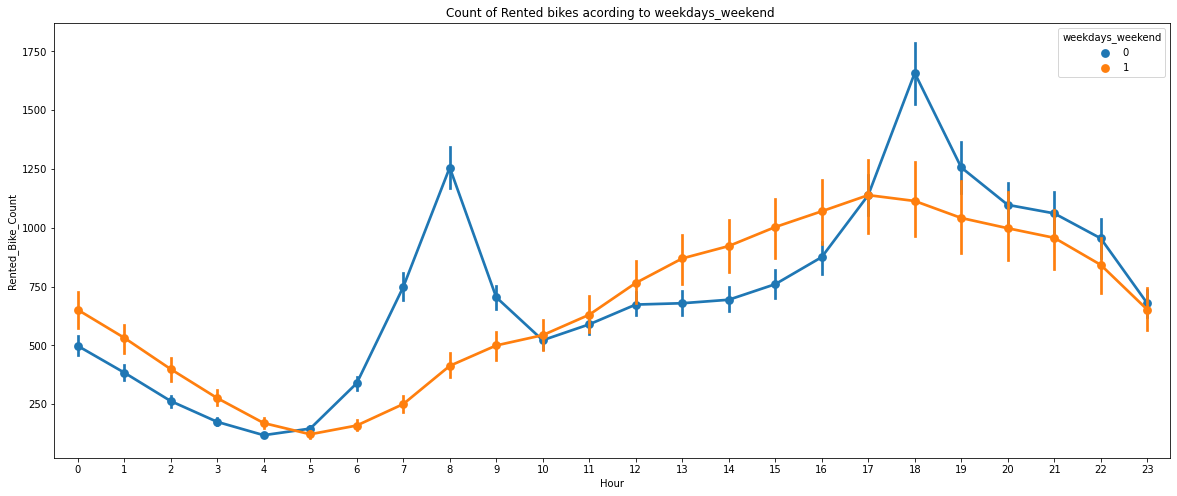

In [26]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* ***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***   

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

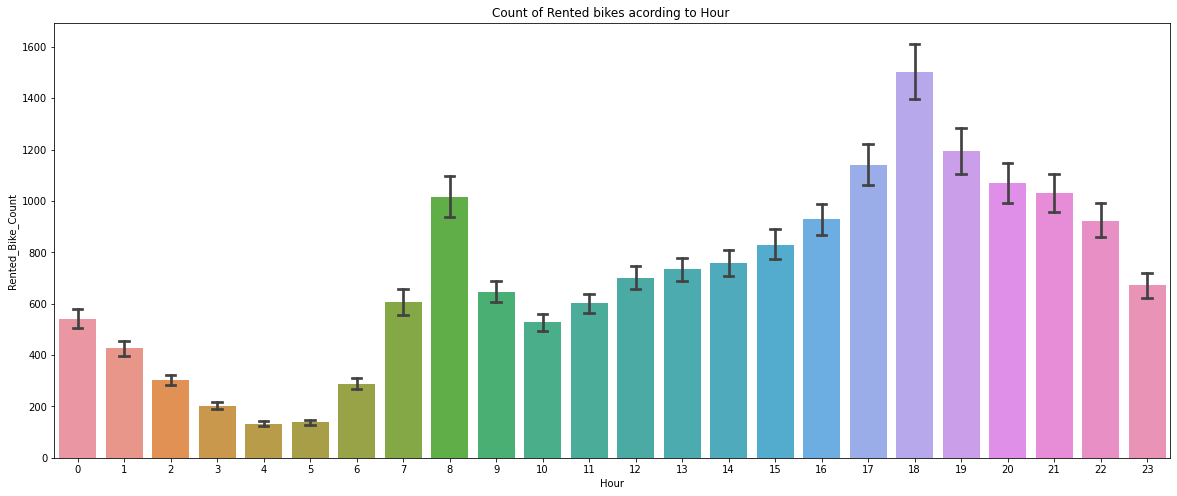

In [27]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

* ***In the above plot which shows the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***   

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

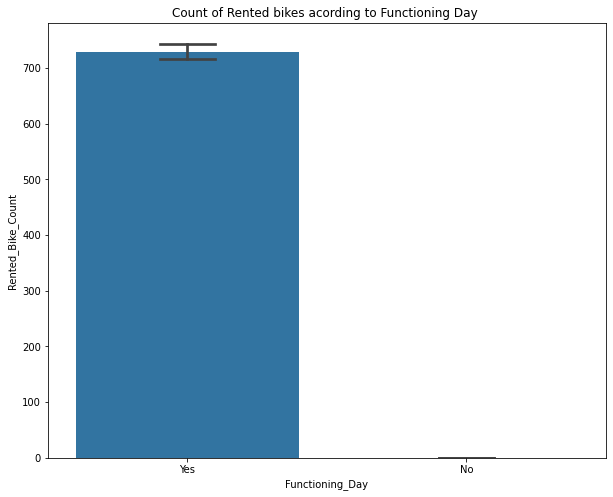

In [28]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

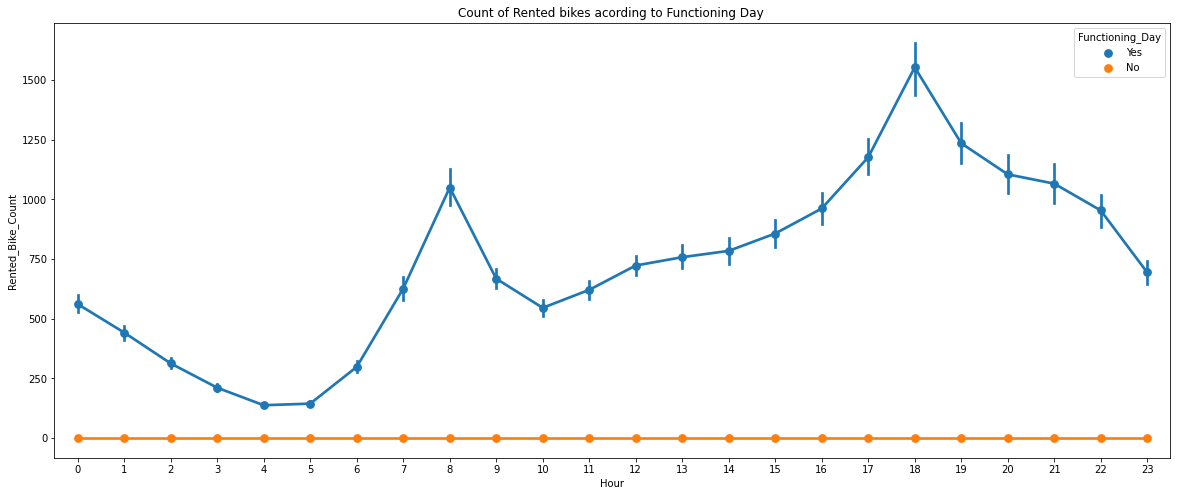

In [29]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* ***In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,***
* ***Peoples dont use reneted bikes in no functioning day.*** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

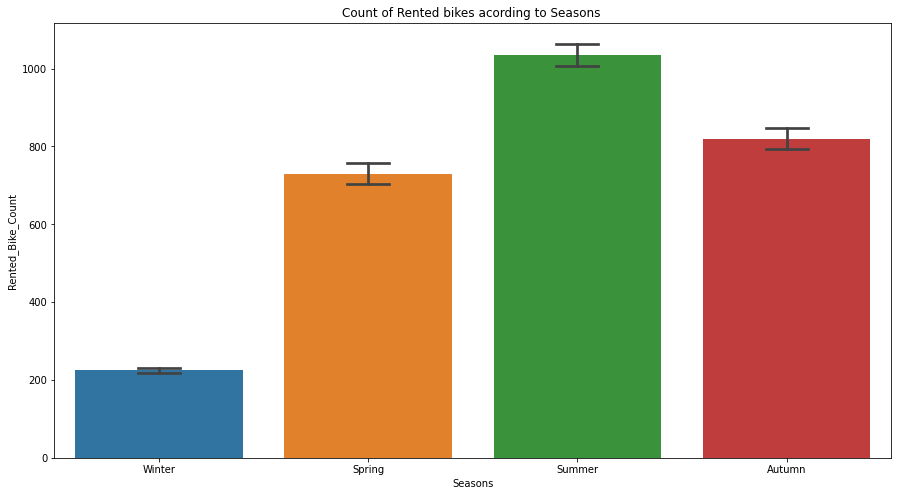

In [30]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

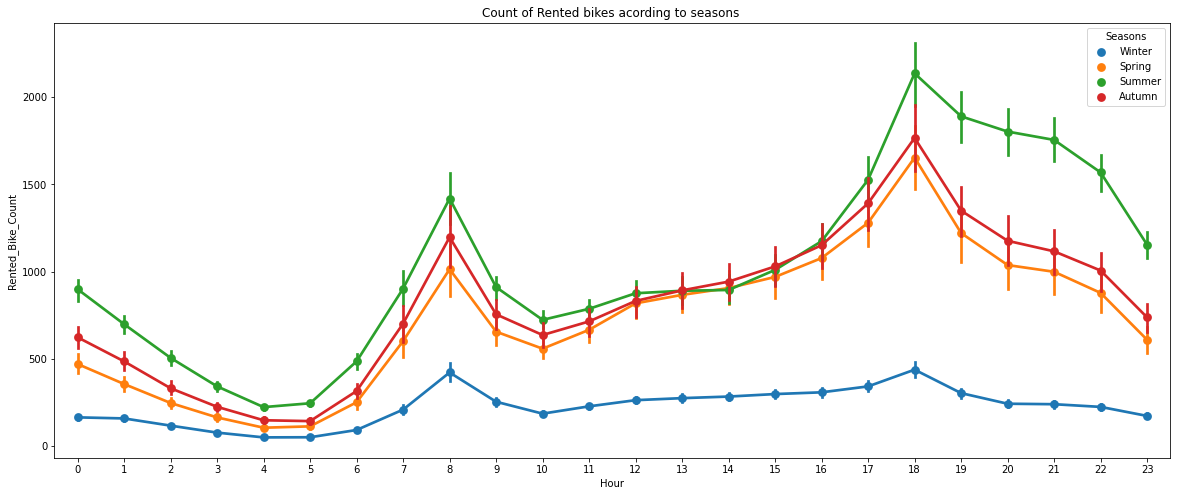

In [31]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

* ***In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.***
* ***In winter season the use of rented bike is very low because of snowfall.***

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

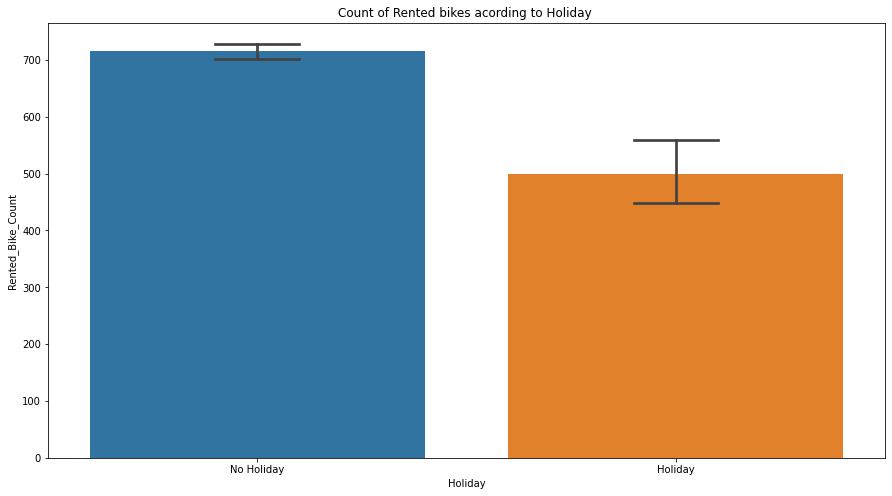

In [32]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

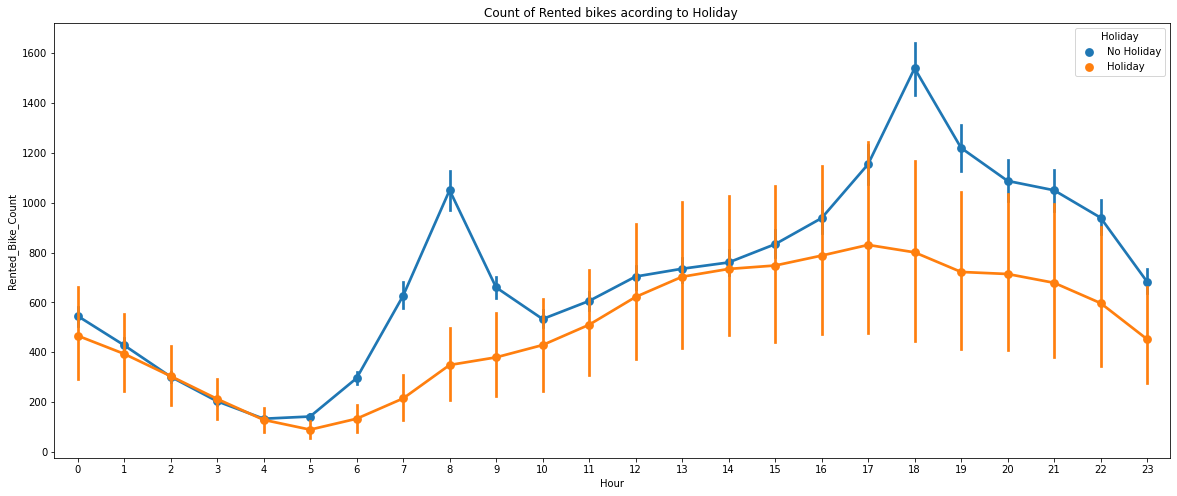

In [33]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***plot shows that in holiday people uses the rented bike from 2pm-8pm***

In [34]:
#assign the numerical coulmn to variavle
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

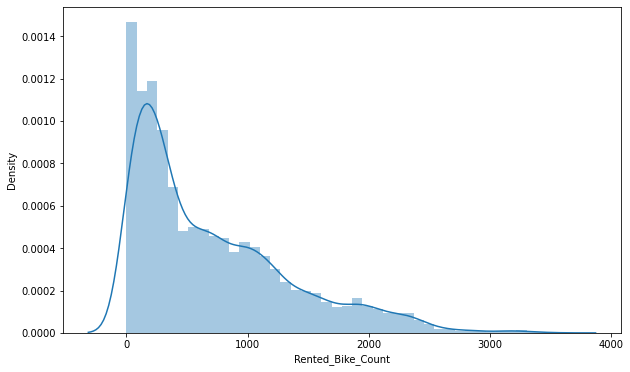

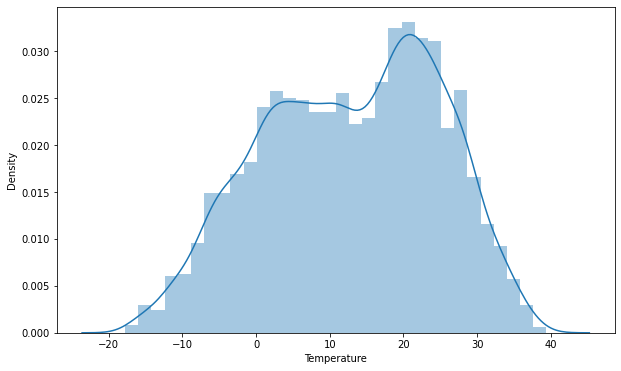

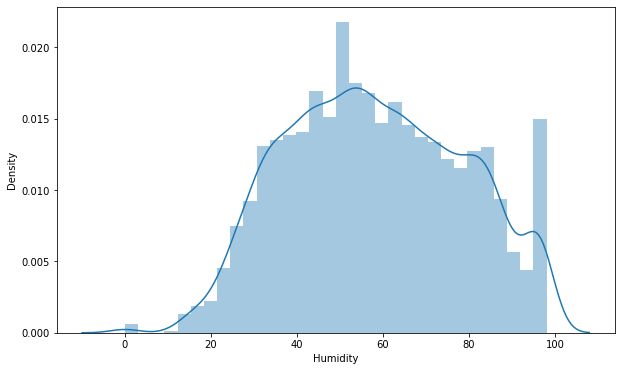

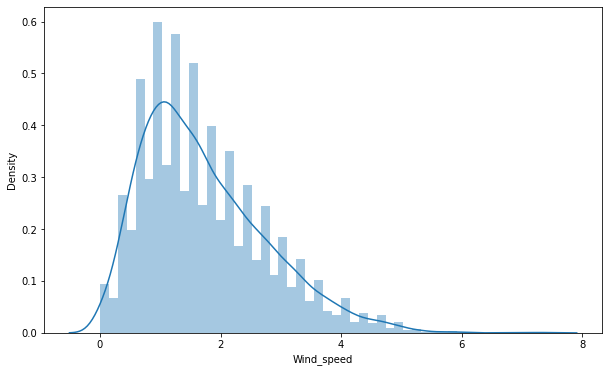

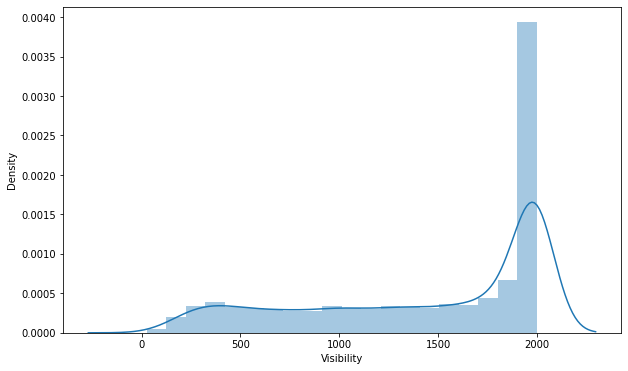

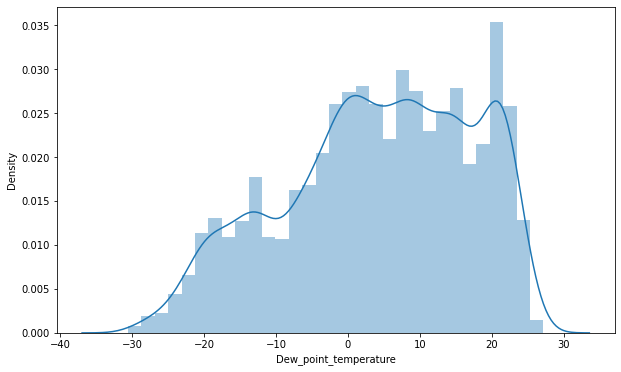

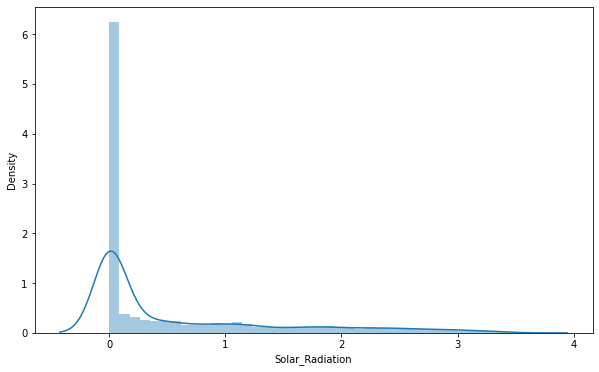

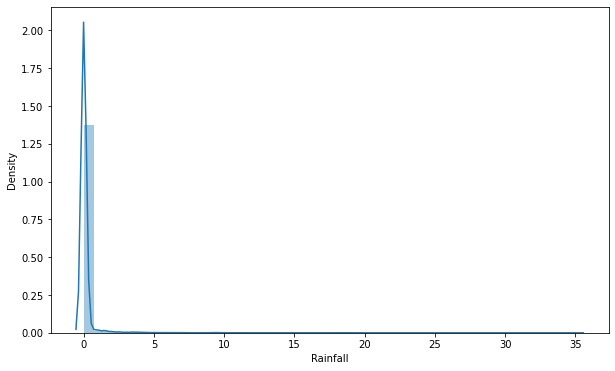

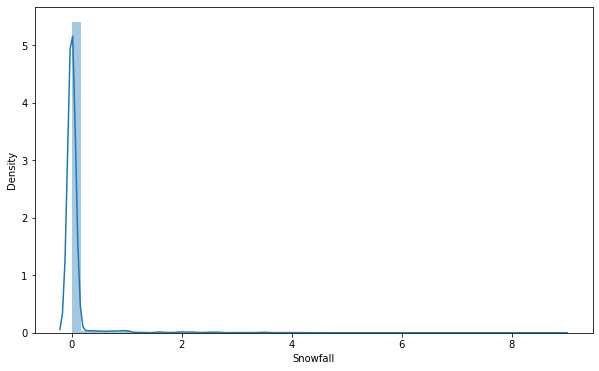

In [35]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

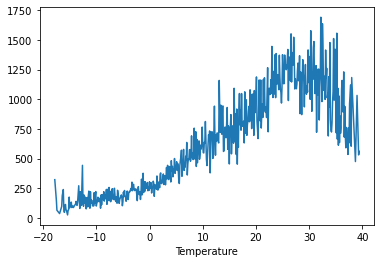

In [36]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

***Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000***

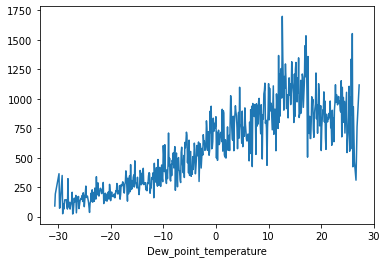

In [42]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

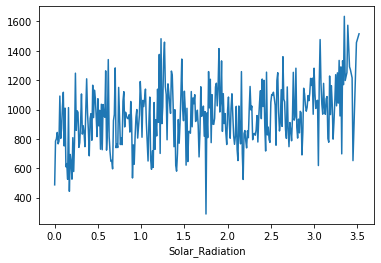

In [37]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()


* ***people like to ride bikes when it is pretty hot around 25°C in average***

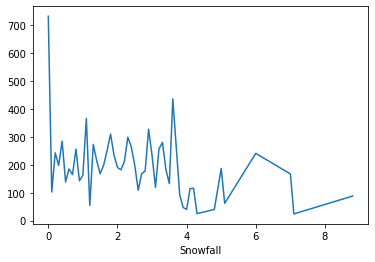

In [38]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()


* ***We can see on the y-axis, the amount of rents is very low When we have more than 4 cm of snow, the bike rents is much lower***

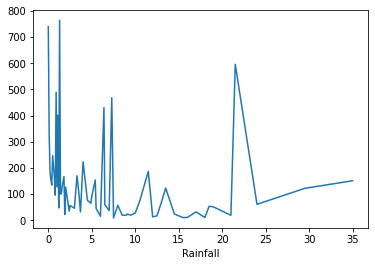

In [39]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


* ***We can see that even if it rains a lot of korean rent bikes, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

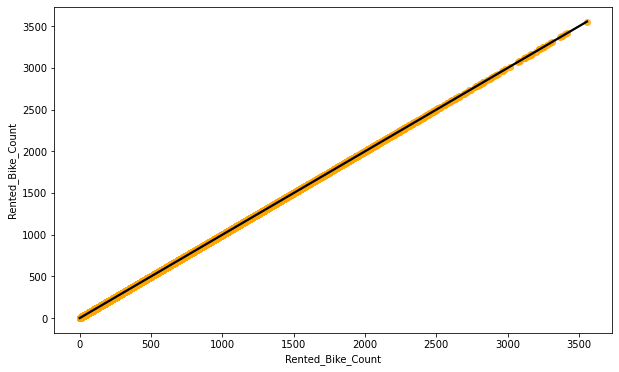

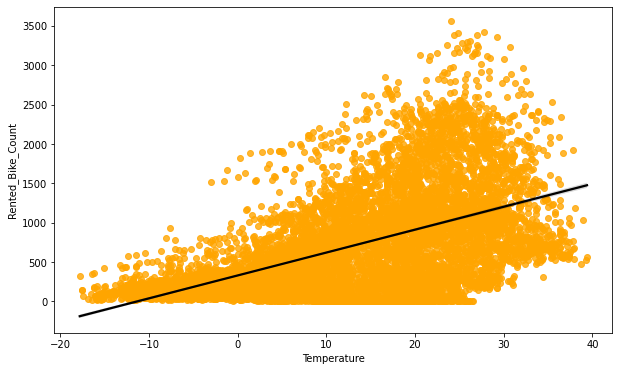

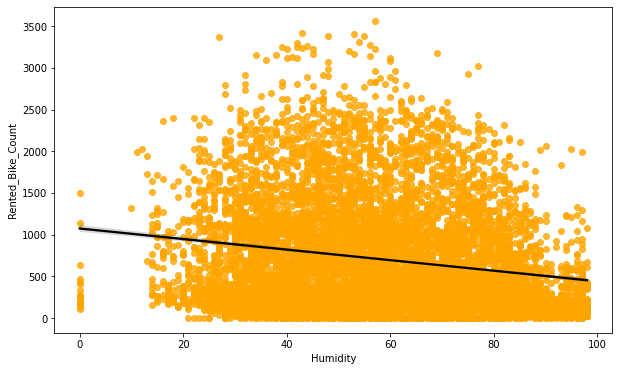

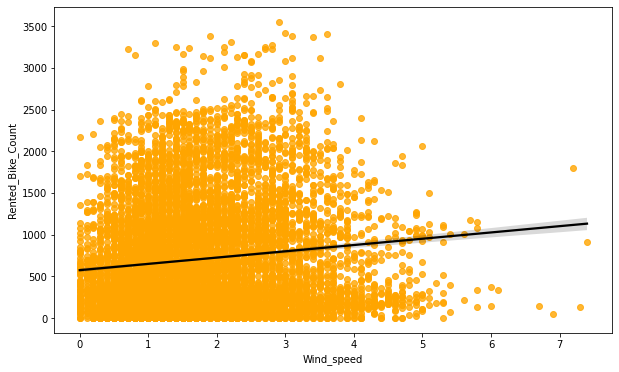

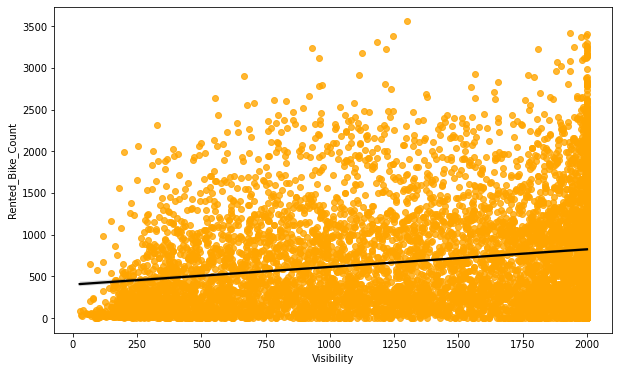

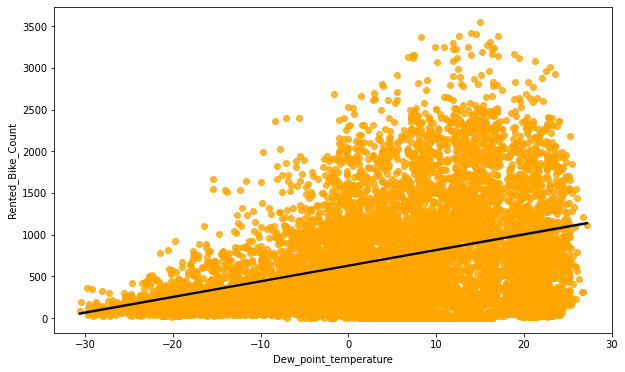

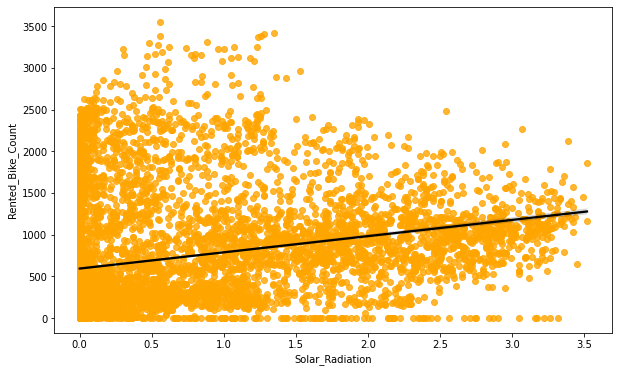

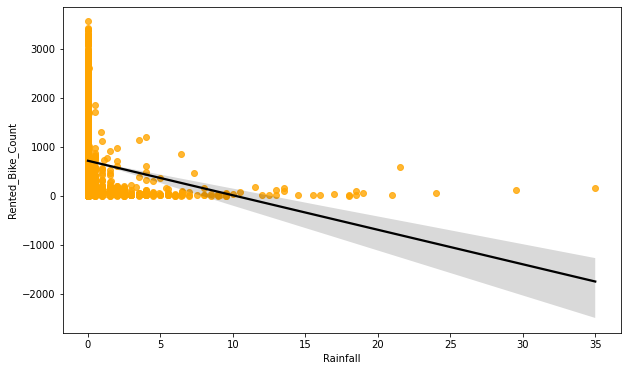

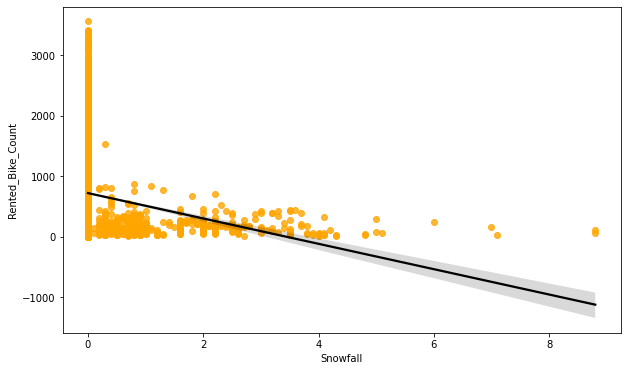

In [40]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

# Correlation matrix

In [44]:
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [47]:
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [46]:
## fit a OLS model with intercept on TV and Radio

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:35:48   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X.iloc[:,1:].corr()

,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Temperature,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


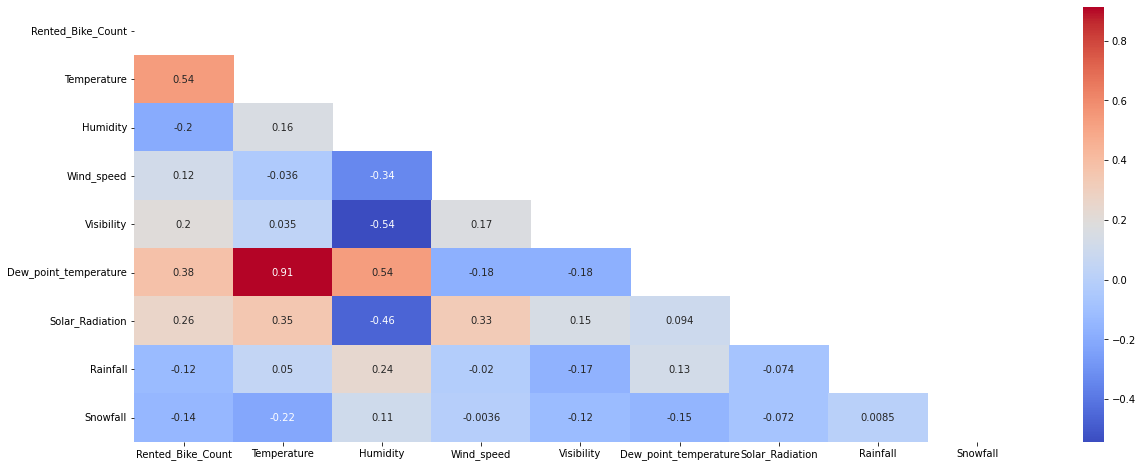

In [49]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

***We can observe that on the target variable line the most positively correlated variables to the rent are :*** 
*the temperature
*the dew point temperature
*the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall





* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)'  so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [50]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [51]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.9+ KB


#multicolinearity

In [52]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [53]:
calculate_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count','Dew_point_temperature']]])
#we can remove dew point tem as it is coorelated to temprature 

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Wind_speed,4.079926
3,Visibility,4.409448
4,Solar_Radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901


In [54]:
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [55]:
# convert catgerical features into the dummies variables
categorical_feature = pd.get_dummies(categorical_features,drop_first=True)

In [56]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


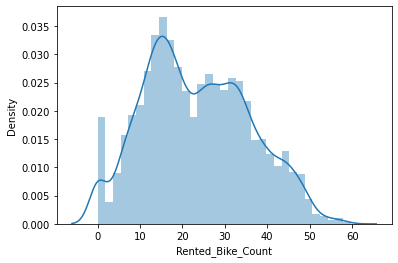

In [57]:
sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']))

#one hot encoding

In [61]:
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

#cols = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend']
for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()       

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


# Train Test split for linear regression

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 9)
(2190, 9)


In [62]:
X = bike_df_copy.drop(columns=['Wind_speed','Rented_Bike_Count'], axis=1)
y = bike_df_copy['Rented_Bike_Count']

#Model Training

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
          GradientBoostingRegressor()]

In [ ]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [ ]:
for model in models:
    train(model)

# Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [64]:
reg.score(X_train, y_train)

0.4017960546282255

In [65]:
y_pred_train=reg.predict(X_train)
y_pred=reg.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 248585.83497497582
RMSE : 498.5838294359092
MAE : 367.9838501167628
R2 : 0.40179605462822543
Adjusted R2 : 0.3993264053124703


In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [68]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-193300.04783718553
